In [1]:
import numpy as np
from numpy.linalg import inv
from matplotlib import transforms, ticker, pyplot as plt
import matplotlib
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import math
%matplotlib inline

/home/andrey/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [3]:
x = tf.placeholder(tf.float64, shape=[None])
y = 1/x + tf.sqrt(10*x)

g = tf.gradients(y, x)[0]
h = tf.hessians(y, x)[0]

In [4]:
nPoints = 100
x_vals = np.linspace(0.3, 1.5, nPoints)
x0 = 0.4

In [5]:
session = tf.Session()
y_vals = session.run(y, {x: x_vals})
y0 = session.run(y, {x: [x0]})
g0, h0 = session.run([g, h], {x: [x0]})
g0 = g0[0]
h0 = h0[0, 0]

fLinApprox = lambda x: y0 + g0*(x - x0)
fQuadApprox = lambda x: y0 + g0*(x - x0) + 1/2*h0*(x - x0)**2

quadMin_x = x0 - g0/h0
quadMin_y = fQuadApprox(quadMin_x)

/home/andrey/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


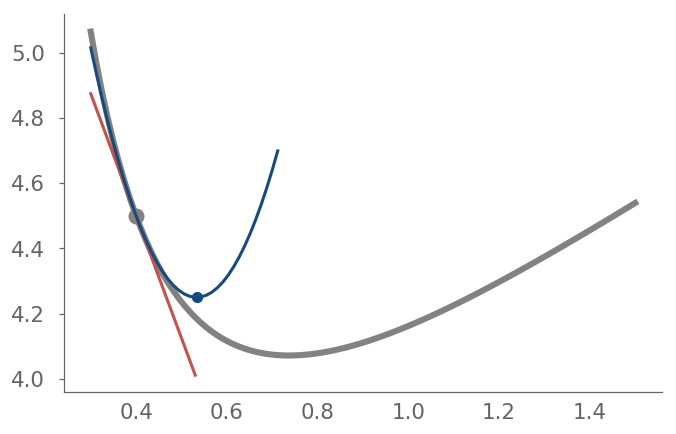

In [6]:
# create new figure
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), # width, height in inches
                        dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)

# draw received tickets line with markers
ax1.plot(x_vals, y_vals, linewidth=4, color=GRAY6)
ax1.scatter([x0], [y0], s=90, color=GRAY6, clip_on=False)

ax1.plot(x_vals[:20], fLinApprox(x_vals[:20]), linewidth=2, color=RED1)
ax1.plot(x_vals[:35], fQuadApprox(x_vals[:35]), linewidth=2, color=BLUE1)
ax1.scatter([quadMin_x], [quadMin_y], s=40, color=BLUE1, clip_on=False)

# configure x, y tick labels appearance
for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_fontsize(14)
    i.set_color(GRAY4)

# shift y tick labels slightly left
for item in ax1.get_yticklabels():
    offset = transforms.ScaledTranslation(-0.07, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# change the appearance of ticks, tick labels, and gridlines
ax1.tick_params(bottom='off')

# change ticks and spines colors
ax1.tick_params(color=GRAY4)
ax1.spines['bottom'].set_color(GRAY4)
ax1.spines['left'].set_color(GRAY4)

# remove chart border
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

In [9]:
x = tf.placeholder(tf.float64, shape=[None, 2])
y = (1 - x[:,0])**2 + 100*(x[:,1] - x[:,0]**2)**2

g = tf.gradients(y, x)[0]
h = tf.hessians(y, x)[0]

In [10]:
x_grid, y_grid = np.meshgrid(np.arange(-2, 2.1, 0.2), 
                             np.arange(-6, 4.1, 0.2))
x_vals = np.stack([x_grid.ravel(), y_grid.ravel()]).T

In [11]:
session = tf.Session()
y_vals = session.run(y, {x: x_vals})
z_grid = y_vals.reshape(x_grid.shape)

x0 = np.array([0, -5])
y0 = session.run(y, {x: [x0]})[0]
g0, h0 = session.run([g, h], {x: [x0]})
h0 = np.squeeze(h0)

In [12]:
fLinApprox = lambda x: y0 + g0.dot((x - x0).T)
fQuadApprox = lambda x: y0 + g0.dot((x - x0).T) + 1/2*(x - x0).dot(h0).dot((x - x0).T)
x_grid_l, y_grid_l = np.meshgrid(np.arange(-0.8, 0.81, 0.2), 
                                 np.arange(-6, -2, 0.2))
x_vals_l = np.stack([x_grid_l.ravel(), y_grid_l.ravel()]).T
z_grid_l = fLinApprox(x_vals_l).reshape(x_grid_l.shape)

x_grid_q, y_grid_q = np.meshgrid(np.arange(-1.2, 1.21, 0.2), 
                                 np.arange(-6, 4.1, 0.2))
x_vals_q = np.stack([x_grid_q.ravel(), y_grid_q.ravel()]).T
z_grid_q = np.array([fQuadApprox(np.array([x_vals_q[i]]))[0] for i in range(len(x_vals_q))]).reshape(x_grid_q.shape)

In [35]:
quadMin_x = x0 - inv(h0).dot(g0.T).T
quadMin_y = fQuadApprox(quadMin_x)
quadMin_x = quadMin_x[0]

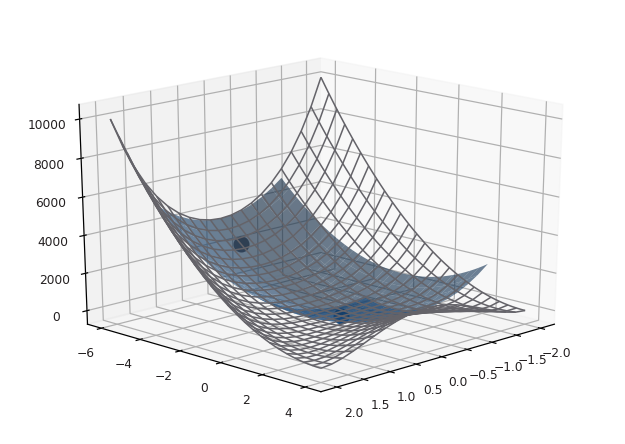

In [36]:
fig = plt.figure(figsize=(7, 5), dpi=110)
ax = fig.add_subplot(111, projection='3d')
# configure tick labels appearance
for i in ax.get_yticklabels() + ax.get_xticklabels() + ax.get_zticklabels():
    i.set_fontsize(8)
    i.set_color(GRAY1)
ax.view_init(20, 45)
ax.plot_wireframe(x_grid, y_grid, z_grid, linewidth=1, color=GRAY4)
ax.scatter(*x0, y0, s=90, color=GRAY4)

#ax.plot_surface(x_grid_l, y_grid_l, z_grid_l, color=BLUE1, alpha=0.6)
ax.plot_surface(x_grid_q, y_grid_q, z_grid_q, color=BLUE1, alpha=0.6)
ax.scatter(*quadMin_x, quadMin_y, s=90, color=BLUE1)

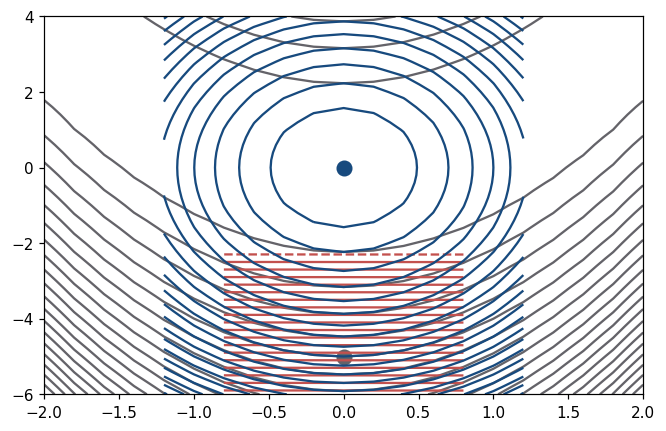

In [37]:
# create new figure
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), # width, height in inches
                        dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)
ax1.scatter(*x0, s=90, color=GRAY4)
ax1.scatter(*quadMin_x, s=90, color=BLUE1)
ax1.contour(x_grid, y_grid, z_grid, 20, colors=GRAY4)
ax1.contour(x_grid_l, y_grid_l, z_grid_l, 20, colors=RED1)
ax1.contour(x_grid_q, y_grid_q, z_grid_q, 20, colors=BLUE1)

In [4]:
def rosenbrock(x, y, a, b):
    return (a - x)**2 + b*(y - x**2)**2

In [5]:
x_grid, y_grid = np.meshgrid(np.arange(-2, 2.1, 0.2), 
                             np.arange(-1, 3.1, 0.2))
z_grid = rosenbrock(x_grid, y_grid, 1, 100)

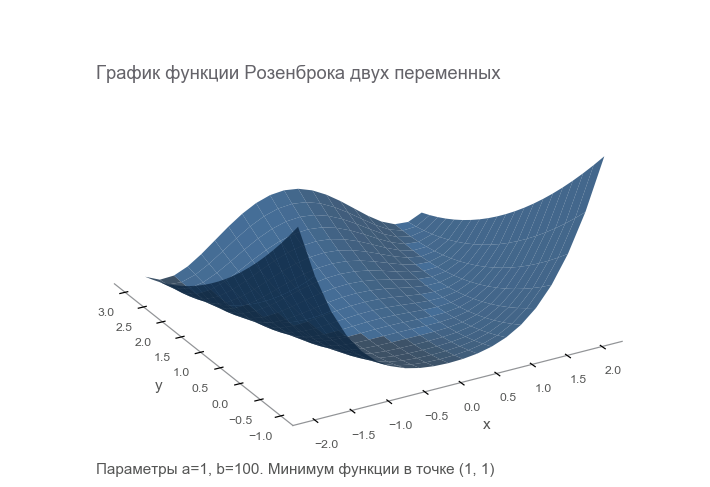

In [10]:
fig = plt.figure(figsize=(8, 5), dpi=110)
fig.subplots_adjust(bottom=0.1)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40, -120)
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.8, color=BLUE1)
ax.text2D(0.12, 0.85, 'График функции Розенброка двух переменных', color=GRAY4, 
          fontsize=12,
          transform=ax.transAxes)
ax.text2D(0.12, -0.07,
           'Параметры а=1, b=100. Минимум функции в точке (1, 1)',
           fontsize=10,
           color=GRAY3,
           transform=ax.transAxes)
ax.grid(False)
ax.set_zticks([])
ax.w_zaxis.line.set_lw(0.)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel('x', color=GRAY3)
ax.set_ylabel('y', color=GRAY3)
ax.w_xaxis.line.set_color(GRAY7)
ax.w_yaxis.line.set_color(GRAY7)
ax.w_zaxis.line.set_color(GRAY7)
for i in ax.get_yticklabels() + ax.get_xticklabels() + ax.get_zticklabels():
    i.set_fontsize(8)
    i.set_color(GRAY3)

<a list of 22 Line2D ticklines objects>